In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import hazm

# Measuring Literature project

In [16]:
df = pd.read_excel("poems.xlsx", names=["Poet", "Poem", "Hemistich", "Verse","Text", "?"], index_col=0)
df.index.name="Index"
df.drop("?", axis=1, inplace=True)
df.Text = df.Text.str.strip()
df.drop([333186], inplace=True)
df.head(10)

,Poet,Poem,Hemistich,Verse,Text,?
Index,,,,,,
1,1,1,1,1,الا یا ایها الساقی ادر کاسا و ناولها,0
2,1,1,2,1,که عشق آسان نمود اول ولی افتاد مشکل‌ها,0
3,1,1,3,2,به بوی نافه‌ای کاخر صبا زان طره بگشاید,0
4,1,1,4,2,ز تاب جعد مشکینش چه خون افتاد در دل‌ها,0
5,1,1,5,3,مرا در منزل جانان چه امن عیش چون هر دم,0
6,1,1,6,3,جرس فریاد می‌دارد که بربندید محمل‌ها,0
7,1,1,7,4,به می سجاده رنگین کن گرت پیر مغان گوید,0
8,1,1,8,4,که سالک بی‌خبر نبود ز راه و رسم منزل‌ها,0
9,1,1,9,5,شب تاریک و بیم موج و گردابی چنین هایل,0


## Mapping the poets' id to names

In [70]:
poet={1:"Hafez", 2:"Saadi", 3:"Molavi", 4:"Attar", 5:"Sanaee", 6:"Vahshi", 7:"Khaghani", 8:"Anvari", 9:"Ouhadi", 10:"Khajoo",
      11:"Eraghi", 12:"Bahar", 13:"Hatef", 14:"Saeb Tabrizi", 15:"Kashani", 16:"Amir Khosro", 17:"Bahaee", 18:"Shahriar",
      19:"Shah Nematollah", 20:"Seyf Farghani", 21:"Salman", 22:"Ghaani", 23:"Orfi", 24:"Obeyd", 25:"Helali",
      26:"Forooghi", 27:"Feyz", 28:"Bidel", 29:"Razi", 30:"Rahi"}

# Exploratory analysis

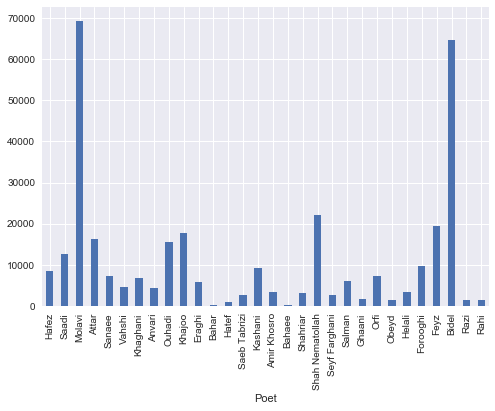

In [82]:
#Distribution of poems by poet
df_count_hemi = df[["Poet"]].groupby("Poet").size()
ax = df_count_hemi.plot("bar")
ax.set_xticklabels(list(poet.values()));

In [27]:
#length of hemistichs over the whole corpus
df.Text.apply(lambda x : len(x)).describe()

count    329707.000000
mean         30.659219
std           5.101621
min           1.000000
25%          27.000000
50%          31.000000
75%          34.000000
max          57.000000
Name: Text, dtype: float64

C:\Users\Mathieu\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


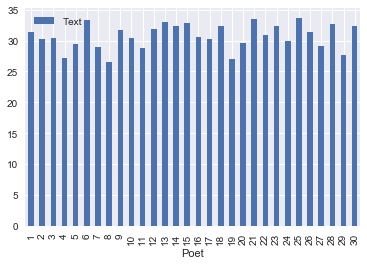

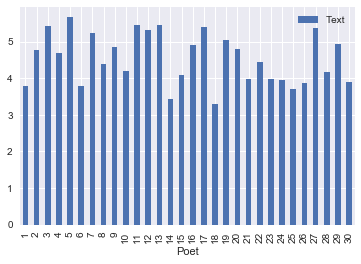

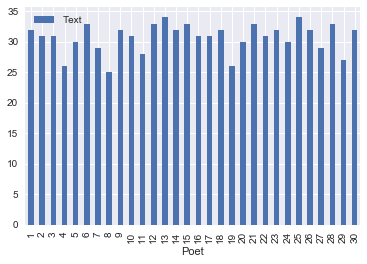

In [59]:
#length of hemistichs per author
length_per_author = df[["Poet","Text"]]
length_per_author.Text = length_per_author.Text.apply(lambda x : len(x))
length_per_author.groupby("Poet").mean().plot(kind="bar")
length_per_author.groupby("Poet").std().plot(kind="bar")
length_per_author.sort_values(["Text"],ascending=True).groupby("Poet").median().plot(kind="bar")

In [ ]:
#length of poems